In [120]:
%matplotlib inline

import os 
import librosa
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util
import matplotlib.pyplot as plt
import generate_global_features_2 as ggf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm, neighbors
from sklearn.naive_bayes import GaussianNB

importlib.reload(util)
importlib.reload(ggf)

<module 'generate_global_features_2' from '/var/tmp/ff/tcc/code/generate_global_features_2.py'>

In [121]:
num_species      = 3
n_min_per_specie = 30

n_global = 4 # number of global functions
scoring  = 'f1_weighted'
song_or_call = 'song'

data_dirs = util.choose_species(num_species)
data_dirs = util.check_num_files(data_dirs, song_or_call, num_species, n_min_per_specie)
print(data_dirs)

#data_dirs = ['/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Synallaxis spixi/', 
#             '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Trogon surrucura/', 
#             '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Vanellus chilensis/']

data_dirs = ['/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Basileuterus leucoblepharus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Theristicus caudatus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Gnorimopsar chopi/']
#data_dirs_pulse = util.dirs_to_pulse_dirs(data_dirs)


#print(data_dirs_pulse)
#data_dirs_pulse = ['/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-4/Synallaxis spixi/', 
#                 '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-4/Trogon surrucura/', 
#                 '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Pulsos_Parte-4/Vanellus chilensis/']



#data_dirs = ['/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Synallaxis spixi/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Trogon surrucura/', 
#             '/Users/felipefelix/USP/tcc/dataset/pr_article/syllables/experimentos_100/Vanellus chilensis/']

numero de versoes segundo a fucao: 4
numero de versoes segundo a fucao: 4
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 4
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 5
numero de versoes segundo a fucao: 4
['/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thamnophilus ruficapillus/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Tangara desmaresti/', '/var/tmp/ff/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Myiophobus fasciatus/']


In [122]:
print(util.FEATURES)
feat = util.FEATURES[0]

#labels_dict_p, labels_p, data_p = ggf.generate_global_features(n_global, feat, data_dirs_pulse, song_or_call, util.GLOBAL_FUNCTIONS, version = None)

labels_dict_o, labels_o, data_o = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)
#labels_dict_f1, labels_f1, data_f1 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered1')
#labels_dict_f2, labels_f2, data_f2 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered2')
#labels_dict_f3, labels_f3, data_f3 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered3')
#labels_dict_f4, labels_f4, data_f4 = ggf.generate_global_features(n_global, feat, data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = 'filtered4')


# MULTI-FEATURES

#labels_dict_o, labels_o, data_o = ggf.generate_global_multi_features(n_global, ['spec_band', 'spec_cent'], data_dirs, song_or_call, util.GLOBAL_FUNCTIONS, version = None)


['rmse', 'mfcc', 'spec_band', 'spec_cent', 'spec_roll', 'syllable_dur', 'syllable_dur_list', 'zcr']
numero de versoes segundo a fucao: 4
number of files loaded: 139


In [119]:

print(labels_dict_o)
#print(labels_dict_p)
# print(labels_dict_f1)
# print(labels_dict_f2)
# print(labels_dict_f3)
#print(labels_dict_f4)



print(labels_o)
#print(labels_p)

# print(labels_f1)
# print(labels_f2)
# print(labels_f3)
#print(labels_f4)

print(len(labels_o))
#print(len(labels_p))

# print(len(labels_f1))
# print(len(labels_f2))
# print(len(labels_f3))
#print(len(labels_f4))

#print(data_o[:10])
#print(data_p[:10])
#print(data_f4[:10])

# print(data_f1[:10])
# print(data_f2[:10])
# print(data_f3[:10])

print(len(data_o))
#print(len(data_p))
#print(len(data_f4))
# print(len(data_f1))
# print(len(data_f2))
# print(len(data_f3))


{'Theristicus Caudatus': 1, 'Gnorimopsar Chopi': 2, 'Basileuterus Leucoblepharus': 0}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
139
173


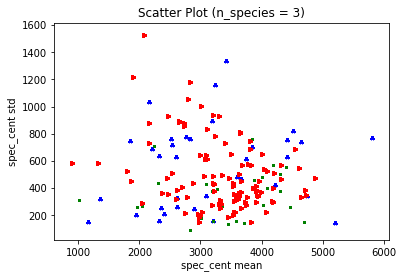

In [94]:
util.plot_scatter(data_o[:,0], data_o[:,1], labels_o, feat + ' mean', feat + ' std')

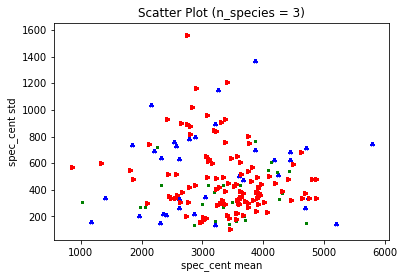

In [95]:
util.plot_scatter(data_f4[:,0], data_f4[:,1], labels_f4, feat + ' mean', feat + ' std')

In [60]:
util.plot_scatter(data_f1[:,2], data_f1[:,3], labels_f1, feat + ' mean', feat + ' std')

NameError: name 'data_f1' is not defined

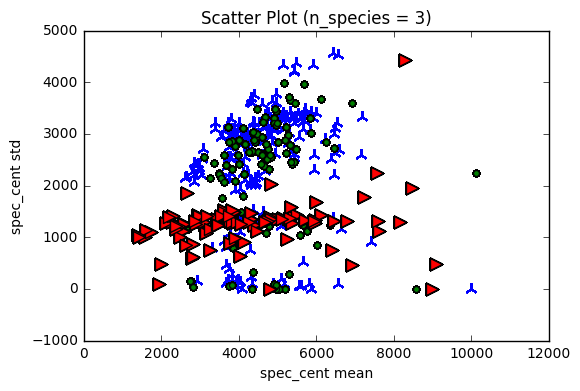

In [15]:
util.plot_scatter(data_f2[:,2], data_f2[:,3], labels_f2, feat + ' mean', feat + ' std')

In [96]:
def generate_scores(clf, clf_name, data, labels, scoring, cv = 5):
    scores  = cross_val_score(clf, data, labels, n_jobs = -1, cv = cv, scoring = scoring)
    print(scores)
    print('{0} - {1}: {2:.2f} (+/- {3:.2f})'.format(clf_name, scoring, scores.mean(), scores.std() * 2))


In [97]:
clf     = neighbors.KNeighborsClassifier(3, weights = 'uniform')

#for scoring in ['f1_weighted', 'f1_micro', 'f1_macro']:
#    print(scoring)
#    generate_scores(clf, 'kNN', data_o, labels_o, scoring)

generate_scores(clf, 'kNN', data_o, labels_o, scoring)

#generate_scores(clf, 'kNN', data_p, labels_p, scoring)

#generate_scores(clf, 'kNN', data_f1, labels_f1, scoring)
#generate_scores(clf, 'kNN', data_f2, labels_f2, scoring)
#generate_scores(clf, 'kNN', data_f3, labels_f3, scoring)
generate_scores(clf, 'kNN', data_f4, labels_f4, scoring)


/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.59931973  0.57142857  0.51715686  0.53248082  0.5038991 ]
kNN - f1_weighted: 0.54 (+/- 0.07)
[ 0.51185185  0.58992674  0.63115246  0.51384083  0.69133632]
kNN - f1_weighted: 0.59 (+/- 0.14)


In [98]:
clf     = GaussianNB()

generate_scores(clf, 'gNB', data_o, labels_o, scoring)
#generate_scores(clf, 'gNB', data_p, labels_p, scoring)

#generate_scores(clf, 'gNB', data_f1, labels_f1, scoring)
#generate_scores(clf, 'gNB', data_f2, labels_f2, scoring)
#generate_scores(clf, 'gNB', data_f3, labels_f3, scoring)
generate_scores(clf, 'gNB', data_f4, labels_f4, scoring)


/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.53638726  0.47142857  0.59511654  0.51402715  0.47043779]
gNB - f1_weighted: 0.52 (+/- 0.09)


/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/hom

[ 0.51790034  0.56065503  0.56911765  0.49755656  0.61266968]
gNB - f1_weighted: 0.55 (+/- 0.08)


In [99]:
clf = svm.SVC(kernel = 'linear', max_iter=100000000, C = 1, decision_function_shape='ovr')

generate_scores(clf, 'SVM', data_o, labels_o, scoring)
#generate_scores(clf, 'SVM', data_p, labels_p, scoring)

#generate_scores(clf, 'SVM', data_f1, labels_f1, scoring)
#generate_scores(clf, 'SVM', data_f2, labels_f2, scoring)
#generate_scores(clf, 'SVM', data_f3, labels_f3, scoring)
generate_scores(clf, 'SVM', data_f4, labels_f4, scoring)



/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.48292181  0.47142857  0.44        0.5547804   0.53517071]
SVM - f1_weighted: 0.50 (+/- 0.08)


/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gradmac/fsfelix/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[ 0.52678571  0.57435897  0.51764706  0.47930283  0.53891403]
SVM - f1_weighted: 0.53 (+/- 0.06)
